# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [37]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [38]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [39]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [200,300, 400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3067,13240,23127,3941,9959,731
1,16448,6243,6360,824,2662,2005
2,4446,906,1238,3576,153,1014


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

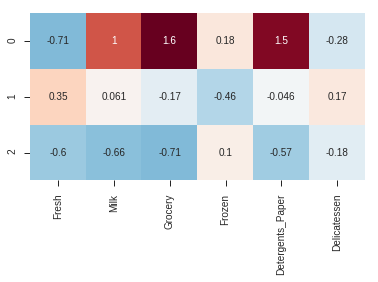

In [40]:
# normalized expenditures, credit for code snippet goes to reviewer
import seaborn as sns
sns.heatmap((samples-data.mean())/data.std(ddof=0), annot=True, cbar=False, square=True)

**Answer:** 
* 200: Higher than avg consumption of grocerys, detergents and milk. Close to average consumption of frozen, and below average consumption of delicattesen and fresh food. I'm guessing a small grocery store.
* 300: Overwhelmingly fresh items, and relatively lots of delicatessen. Average use of milk, and below average amounts of everything else. I am guessing a boutique cafe/bakery.
* 400: Smaller scale buyer, with below average consumption of all categories and average consumption of frozen items. However, even though they have below average use of fresh food, the absolute consumption of fresh items is comparable to the frozen items. I'm guessing a fresh juice smoothie stand.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [41]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
targ_feature = data['Detergents_Paper']
new_data = data.drop(['Detergents_Paper'], axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_data, targ_feature, test_size = 0.25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor = regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "score = ", score

score =  0.728655181254


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I chose to predict Detergents_Paper, since it seemed like it was somewhat linearly correlated with groceries. I was able to predict it from the other features with an R^2 score of 0.72, meaning it is significantly correlated with the other features.

Below, I iteratively assigned each feature as the target feature, and did 200 trials with randomized splits and regressions in order to get an average R^2 score. Indeed, of all the features, detergents had the highest R^2 score (0.686), so if I wanted to reduce the dimensionality of the data, detergents would be the first feature to drop since it is the least informative..

In [42]:
# supplemental code from reviewer
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

def r_2_mean(data,feature,runs=200):
    return np.array([calculate_r_2_for_feature(data,feature) 
                     for _ in range(runs) ]).mean().round(4)

print "{0:17} {1}".format("Fresh: ", r_2_mean(data,'Fresh'))
print "{0:17} {1}".format("Milk: ", r_2_mean(data,'Milk'))
print "{0:17} {1}".format("Grocery: ", r_2_mean(data,'Grocery'))
print "{0:17} {1}".format("Frozen: ", r_2_mean(data,'Frozen'))
print "{0:17} {1}".format("Detergents_Paper: ", r_2_mean(data,'Detergents_Paper'))
print "{0:17} {1}".format("Delicatessen: ", r_2_mean(data,'Delicatessen'))

Fresh:            -0.788
Milk:             0.1773
Grocery:          0.6726
Frozen:           -1.1567
Detergents_Paper:  0.6665
Delicatessen:     -2.9425


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

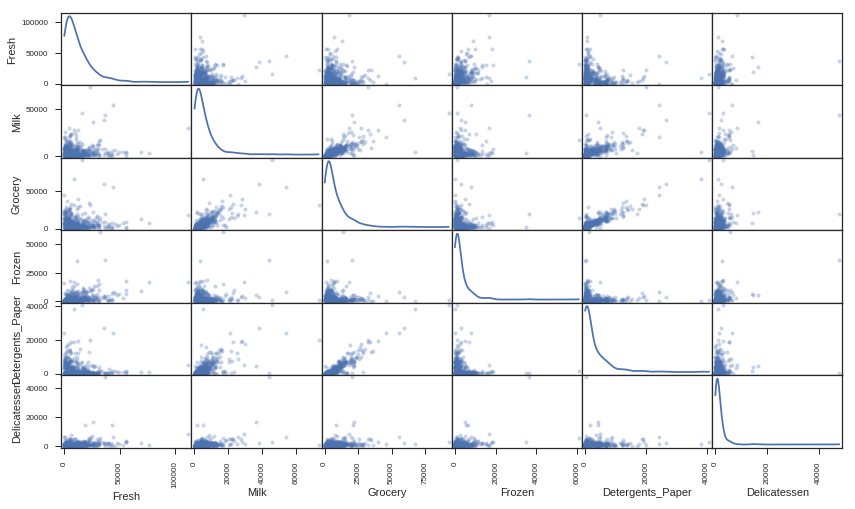

In [43]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** I was right! Groceries and detergent have a strong linear correlation with few outliers (correlation of 0.925). Groceries also seem to be somewhat correlated with milk (0.728), and by extension, milk and detergent have some correlation (0.662). Therefore, linear combinations of milk and groceries should mostly predict detergents.

All the features seem to be distributed with a single mode and a right-handed skew, with a mean relatively close to the origin. 

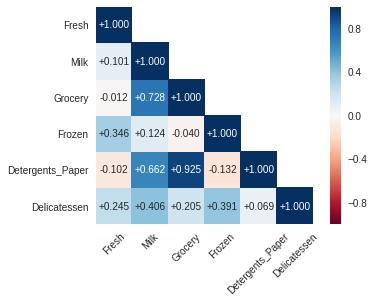

In [44]:
# visualize snippet from reviewer
import matplotlib.pyplot as plt
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

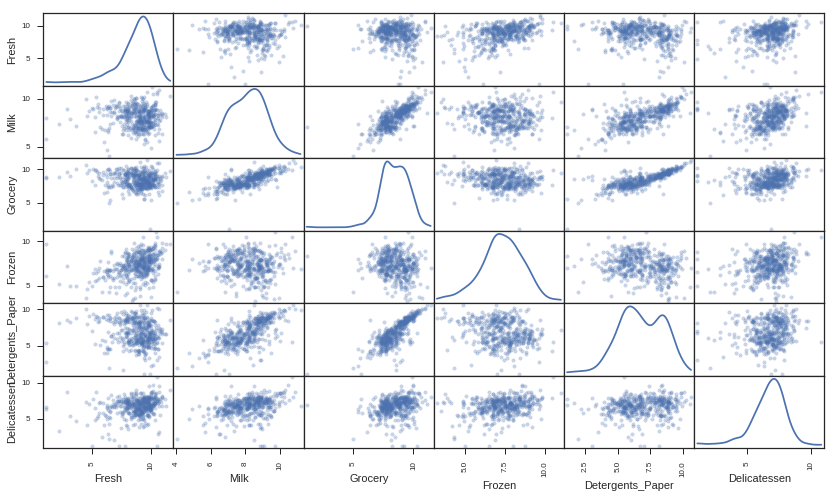

In [45]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

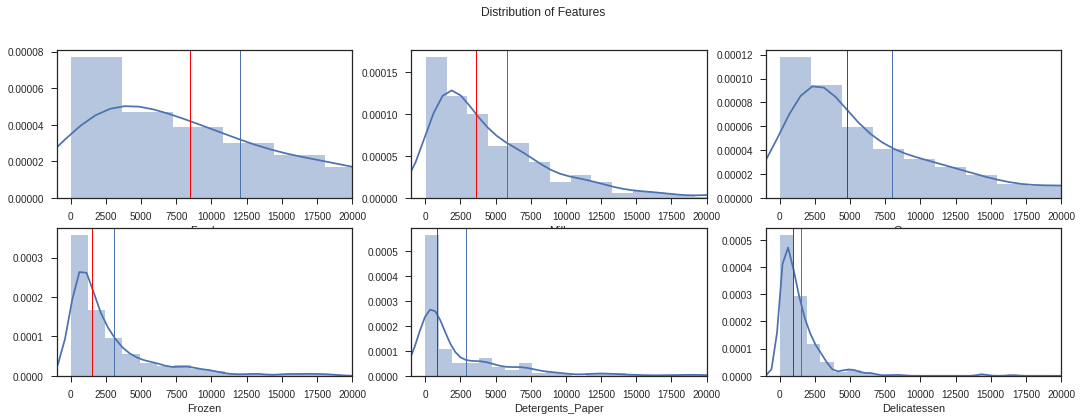

In [46]:
# before transform, credit to reviewer for code
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features')

product_data_by_customer_df = data

for i, col in enumerate(product_data_by_customer_df.columns):
    feature = product_data_by_customer_df[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

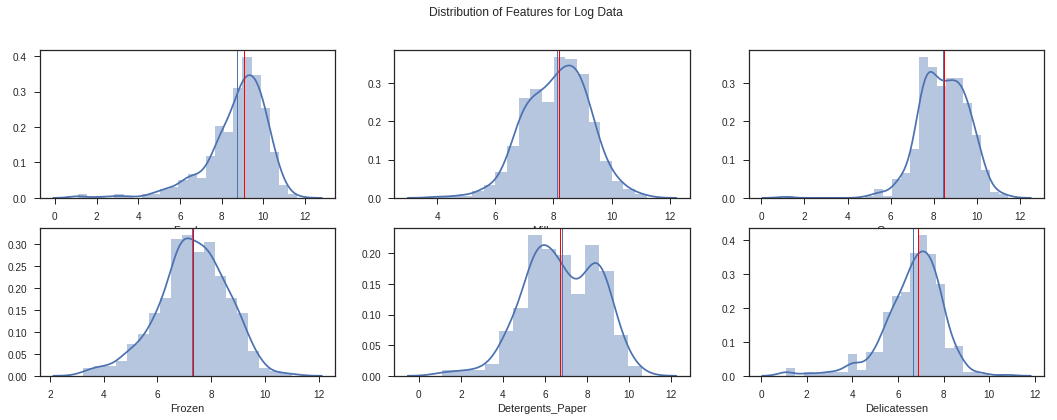

In [47]:
# after log transform, credit to reviewer for code
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features for Log Data')

log_product_data_df = log_data

for i, col in enumerate(log_product_data_df.columns):
    feature = log_product_data_df[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

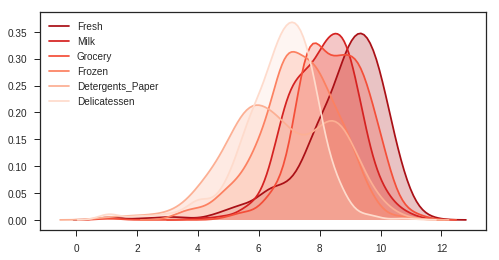

In [48]:
# compare log-transformed features w each other (credit to reviewer)
import matplotlib.pyplot as plt
import seaborn as sns
# set plot style & color scheme
sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    # plot densities of log data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc='best')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [49]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
1,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399
2,8.399760,6.809039,7.121252,8.182000,5.030438,6.921658


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  

Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [75]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers = []
set_dict  = {}


# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    #print "Data points considered outliers for the feature '{}':".format(feature)
    #display(feature_outliers)
    print "{} num outliers: {}".format(feature, len(feature_outliers))
    
    outliers.append(feature_outliers.index.tolist())
    set_dict[feature] = set(feature_outliers.index.tolist())

    
# take one set in setlist. do union with that set and rest of sets. print common outliers

import copy

for feature, set_i in set_dict.iteritems():
    dict_copy = copy.deepcopy(set_dict)
    del dict_copy[feature]
    
    for remaining_feature, set_j in dict_copy.iteritems():
        intersection = set.intersection(set_i, set_j)
        if len(intersection):
            print intersection, "in both {}, {}".format(feature, remaining_feature)

Fresh num outliers: 16
Milk num outliers: 4
Grocery num outliers: 2
Frozen num outliers: 10
Detergents_Paper num outliers: 2
Delicatessen num outliers: 14
set([154]) in both Grocery, Delicatessen
set([75]) in both Grocery, Detergents_Paper
set([154]) in both Grocery, Milk
set([65]) in both Frozen, Fresh
set([154]) in both Delicatessen, Grocery
set([128, 66]) in both Delicatessen, Fresh
set([154]) in both Delicatessen, Milk
set([75]) in both Detergents_Paper, Grocery
set([65]) in both Fresh, Frozen
set([128, 66]) in both Fresh, Delicatessen
set([154]) in both Milk, Grocery
set([154]) in both Milk, Delicatessen


In [76]:
outliers = [154, 75, 65, 66, 128]
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

In [77]:
'''Deleting all outliers just to see how it affects the outcome
'''
outliers_all  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    outliers_all += feature_outliers.index.tolist()

# Remove the outliers, if any were specified
bad_data = log_data.drop(log_data.index[outliers_all]).reset_index(drop = True)

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** There are 48 total outliers. I made a loop to check if any of these outliers were in multiple features. There were 5 customers who were in more than one feature: [154, 75, 65, 66, 128]. Seeing as it looks like we are about to do PCA in the next section, I would argue that we should at the very least remove outliers that are in multiple features because they will add variance to certain features, which could trick PCA into thinking there is non-existing structure in the data's variability. I went ahead and removed all data that were outside 1.5x the interquartile range in more than one feature.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

-------------------------------------- 
 Note to reviewer: IGNORE THIS CELL. Skip to next one. 
 --------------------------------------
all data
all outliers removed


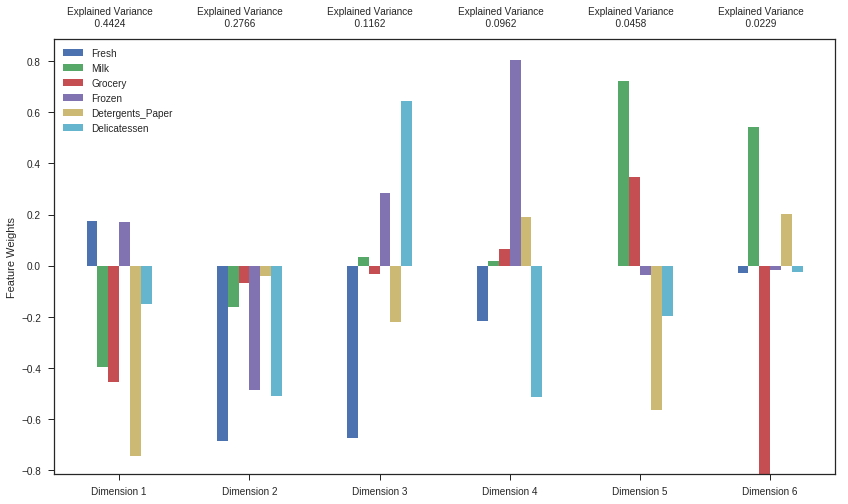

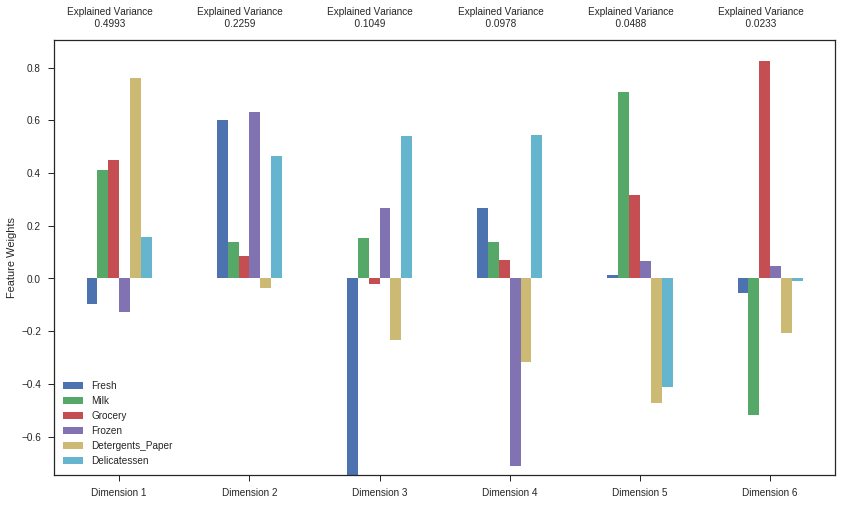

In [53]:
print "-------------------------------------- \n Note to reviewer: IGNORE THIS CELL. Skip to next one. \n --------------------------------------"

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

# repeat PCA with all data
print "all data"
pca_all = PCA(n_components=len(log_data.keys())).fit(log_data)
pca_samples = pca_all.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(log_data, pca_all)

# repeat PCA with all outliers removed data
print "all outliers removed"
pca_all_outliers = PCA(n_components=len(bad_data.keys())).fit(bad_data)
pca_samples = pca_all_outliers.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(bad_data, pca_all_outliers)

In [54]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

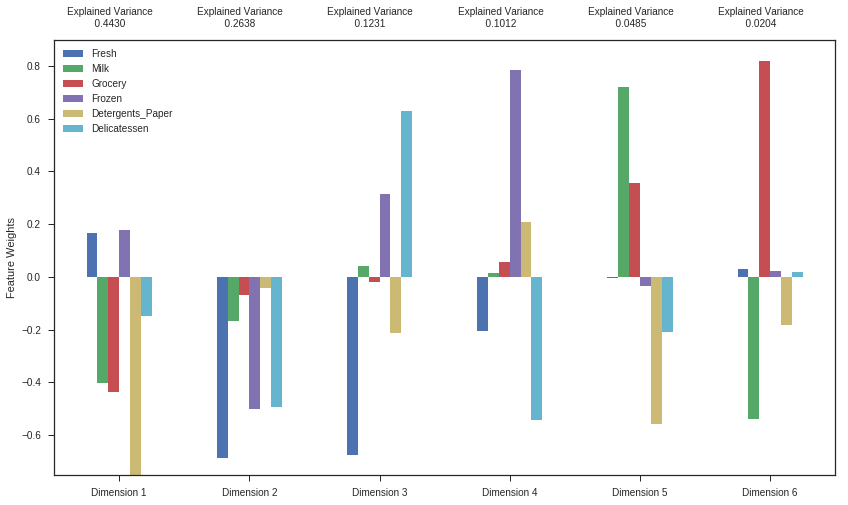

In [78]:
pca = PCA(n_components=len(good_data.keys())).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** The first and second components explain 44% and 26% of the variance in the data, totalling 71% for the first two components. The first four components account for 93% of the total variance.

Judging by the cummulative absolute size of the feature weights, It seems like the strongest predicted features are fresh, frozen, and and detergents. Comparitively, milk and grocery are less strongly predicted. Delicatessen is somewhere in the middle. Based on the direction of the bars, delicatessen seems to be inversely correlated with buying fresh, detergents, or frozen items. 

Component 1 is strongly negatively influenced by detergent/paper, groceries, and milk. These are items which I would expect to be purchased by grocers. Since all of the coefficients for the feature weights I mentioned are negative, a customer with positive projection along this dimension is unlikely to be a grocery store, and vice versa.

Component 2 is strongly negatively influenced by the purchase of fresh, frozen, delicatessen, and a mildly influenced by the purchase of milk. These are all items which are much-needed by restaurants. Since all of the coefficients for the feature weights are negative, a customer with positive projection along this dimension is unlikely to be a restaurant, and vice versa.

Comparing the coefficient weights between the first two components indicates two dominant "purchasing modes" as indicated above.

Component 3 is strongly positviely influenced by frozen and delicatessen, and negatively influenced by fresh ingredients. This seems to me like the purchasing behavior of a frozen delicacy shop, like an icecream shop.

Component 4 is similar to component 3, except it is strongly negativly influenced by delicatessen. This might be a fast-food chain that deep fries frozen foods, such as a fish and chips place. 

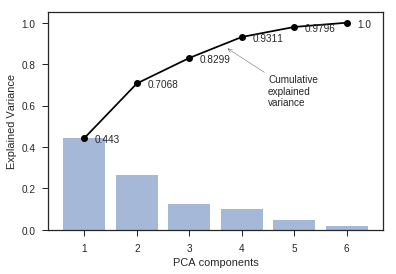

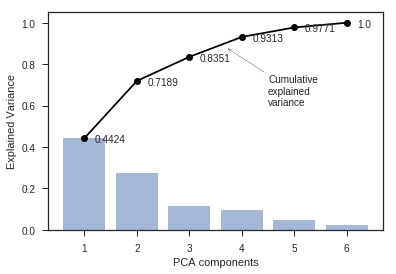

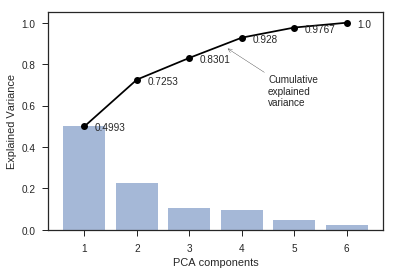

In [56]:
# reviewers code for visualizing cumsum

# create an x-axis variable for each pca component
x = np.arange(1,7)

for P in [pca, pca_all, pca_all_outliers]:
    # plot the cumulative variance
    plt.plot(x, np.cumsum(P.explained_variance_ratio_), '-o', color='black')

    # plot the components' variance
    plt.bar(x, P.explained_variance_ratio_, align='center', alpha=0.5)

    # plot styling
    plt.ylim(0, 1.05)
    plt.annotate('Cumulative\nexplained\nvariance',
                 xy=(3.7, .88), arrowprops=dict(arrowstyle='->'), xytext=(4.5, .6))
    for i,j in zip(x, np.cumsum(P.explained_variance_ratio_)):
        plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))
    plt.xticks(range(1,7))
    plt.xlabel('PCA components')
    plt.ylabel('Explained Variance')
    plt.show()

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [79]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.9903,-0.3645,0.2521,1.5653,0.1922,0.1244
1,-1.2804,-0.9587,-0.4701,-0.9124,-0.2345,-0.2514
2,2.5025,0.1006,1.0091,0.1630,-0.5126,-0.0520


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [80]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [81]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.9903,-0.3645
1,-1.2804,-0.9587
2,2.5025,0.1006


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

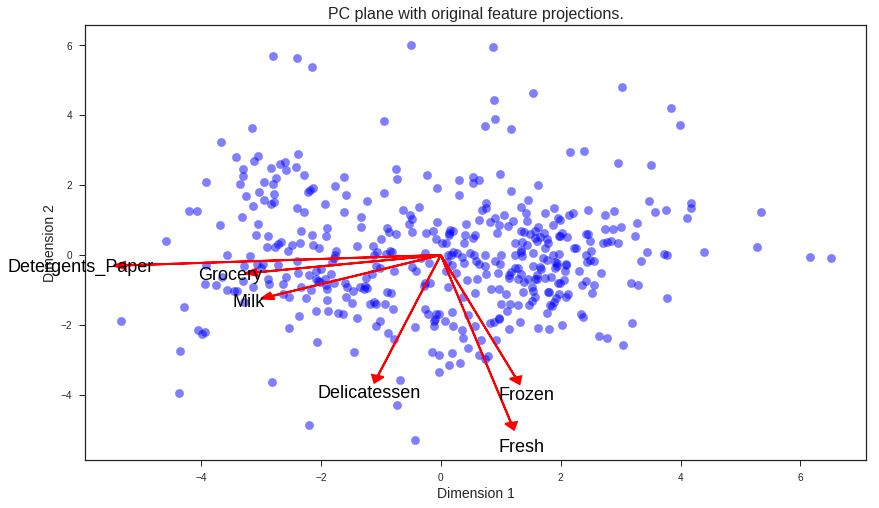

In [82]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

GMMs are good when there is no clear separation between classes, because the soft classification tells you how certain it is about the predicted labels. According to the documentation, you can use it with a Dirichlet process to automatically calculate the number of clusters ("K"). You can also use the 'estimator' parameter to capture the covariance structure of the underlying Gaussian process which the model is hypothetsizing to generate the data.  Different initial conditions may lead to different final outcomes. According to the sci-kit docs, it is "the fastest algorithm for learning mixture models".

GMMs have trouble when the data is very high dimensional ([ref](http://www.nickgillian.com/wiki/pmwiki.php/GRT/GMMClassifier)). Similarly, it has problems if there are not many points per cluster because estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially. It also will always use all the components it has access to, which can confuse it. 

K-means are hard to use to predict the number of clusters. Different initial conditions may lead to different final outcomes, and it is suseptible to getting stuck in local minima ([ref](http://stats.stackexchange.com/a/133841/80433)). It doesn't do well if the raw data has clusters of different sizes or densities ([ref](http://stats.stackexchange.com/a/133841/80433)). The quality of the final clusters are difficult to evaluate ([ref](http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/K-Means_Clustering_Overview.htm)). K-means will always cluster into k clusters, even if there are no clusters in the underlying data. It also does not work well with non-spherical data. According to the sci-kit reference, "KMeans can be seen as a special case of Gaussian mixture model with equal covariance per component." As KMC has fewer calculation steps, I would expect it to be much faster than the GMM.

Given the fact that the data does not have very well separated clusters, soft classification seems smart. The second order confidence information by GMMs seems like it would be useful. We also don't have any of the situations which tend to confuse a GMM. The dataset is not too large, so algorithm speed is not a consideration. Therefore, I will try to use a GMM.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [83]:
# TODO: Apply your clustering algorithm of choice to the reduced data
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for i in range(2,10):
    clusterer = GaussianMixture(n_components=i).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    print "i {} score = {}".format(i, score)

i 2 score = 0.375986045466
i 3 score = 0.334242223121
i 4 score = 0.296491013657
i 5 score = 0.194150483546
i 6 score = 0.25275905548
i 7 score = 0.314636663533
i 8 score = 0.291874070386
i 9 score = 0.321501963555


In [84]:
print "repeat analysis with full dataset"


# TODO: Apply PCA by fitting the good data with only two dimensions
pca_full = PCA(n_components=2).fit(log_data)

# TODO: Transform the good data using the PCA fit above
reduced_data_f = pca_full.transform(log_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples_f = pca_full.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data_f = pd.DataFrame(reduced_data_f, columns = ['Dimension 1', 'Dimension 2'])


for i in range(2,10):
    clusterer_2 = GaussianMixture(n_components=i).fit(reduced_data_f)

    # TODO: Predict the cluster for each data point
    preds_2 = clusterer_2.predict(reduced_data_f)

    # TODO: Find the cluster centers
    centers_2 = clusterer_2.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds_2 = clusterer_2.predict(pca_samples_f)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score_2 = silhouette_score(reduced_data_f, preds_2, metric='mahalanobis')
    print "i {} score = {}".format(i, score_2)

repeat analysis with full dataset
i 2 score = 0.375202702691
i 3 score = 0.382623015259
i 4 score = 0.280235798216
i 5 score = 0.227188520844
i 6 score = 0.220845720916
i 7 score = 0.281291809828
i 8 score = 0.310097604253
i 9 score = 0.312815348695


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** The score is 0.375 for 2 clusters, which reduces to 0.27, and then 0.28, and then it fluctuates between 20 and 30 thereafter. So the 2 cluster model has the best silhouette score. For comparison, the best silhouette score for the full dataset, including outliers, is 3-clusters.

As suggested by a reviewer, I plotted the information-theoretic criteria (BIC) scores. According to that metric, the best model is 4 clusters using spherical covariance types.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [85]:
i=2  # best from loop
clusterer = GaussianMixture(n_components=i).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds, metric='mahalanobis')
print "i {} score = {}".format(i, score)

i 2 score = 0.375986045466


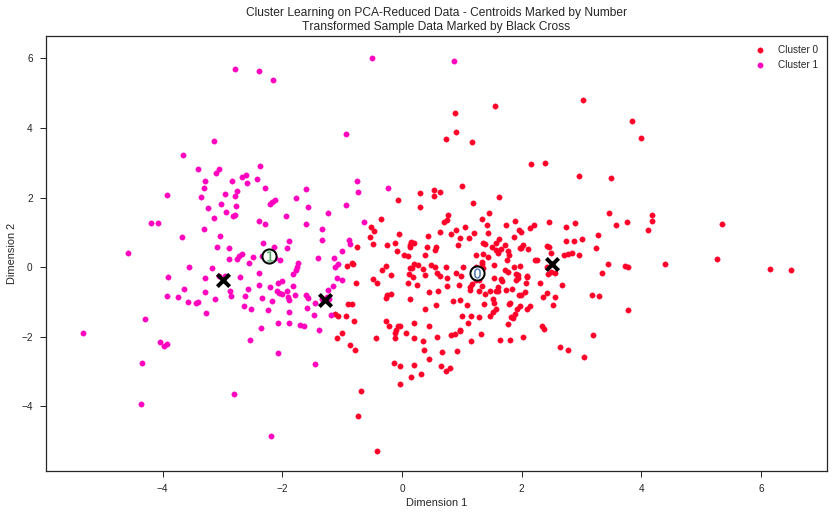

In [86]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

best GMM model: GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=4, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None), bic = 3545.22926758


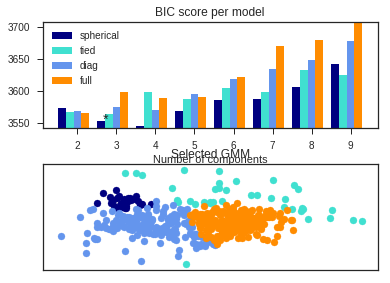

In [65]:
# TODO: Apply your clustering algorithm of choice to the reduced data
from sklearn.mixture import GaussianMixture
import itertools
from scipy import linalg

lowest_bic = np.infty
bic = []
n_components_range = range(2,10)
cv_types = ['spherical', 'tied', 'diag', 'full']
X = reduced_data.values


for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm


bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
print "best GMM model: {}, bic = {}".format(clf, clf.bic(X))
bars = []

# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], color=color)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()



### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [87]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


In [88]:
print samples

   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   3067  13240    23127    3941              9959           731
1  16448   6243     6360     824              2662          2005
2   4446    906     1238    3576               153          1014


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [89]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:**
Segment 1 has a higher than average consumption of groceries, as well as an increased amount of milk and detergents (normalized expenditures of 0.38, 0.27, and 0.35 respectively). It is strongly negativly correlated with fresh and frozen ingredients (-0.54 and -0.41) and moderate expendetures of delicatessen. These are things commonly consumed by households, but no so much by restaurants. I think this segment are grocery stores.

Segment 0, on the other hand, has an across the board reduced demand for all categories. This indicates that these customers do not stock huge amounts of items. Relatively speaking, though, their allocation of resources are high demand for fresh and frozen goods (-0.2 and -0.18), which is a general proxy for foodstuffs. They have a very low demand for detergents, milk, and groceries. The high demand for food, both fresh and frozen, leads me to believe these are restaurants. 

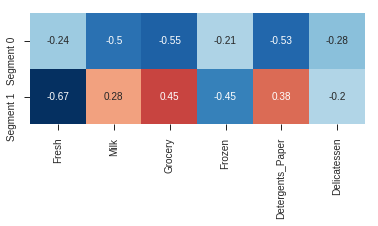

In [90]:
# code snippet from reviewer
sns.heatmap((true_centers-data.mean())/data.std(ddof=1), annot=True, cbar=False, square=True)

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [91]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:** I compared the sample coordinates with the mean true centers. Samples 0 and 1 seem to be closer to the center of cluster 1, and sample 2 seems closer to cluster 0. Looking at the graph above, the sample predictions are well within the boundaries of those respective clusters. Finally, the predictor agrees: sample 0 and 1 are in cluster 1, and sample 2 is in cluster 0.

In question 1, I predicted that sample 0 was a small grocery store, sample 1 was a boutique cafe/bakery, and that sample 2 was a fresh juice smoothie stand. As it turns out, sample 1 is more likely to be a retailer, but it is near the boundary of the two clusters, so it is a bit ambiguous.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** The distributor could make an educated guess as to which of the segments would like or dislike the change in the delivery service. Since the different customers have very different needs, they won't be affected equally by changes in delivery service.

For instance, restaurants rely on very fresh ingredients. We could predict they would not like reduced delivery service. On the other hand, grocery stores are very large and are unlikely to run out of stock if they do not get deliveries every day.

I would pick a likely cluster, filter out points that are classified below a certain threshold certainty (say, 60%) and then randomly assign 5% of the filtered points to the new service. Then, I'd incremently add more users and make sure it isn't reducing profits or bringing complaints. Eventually, if the service is well recieved, I'd switch 100% of the cluster to the new service.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** The distributor could add the customer segment as a new column in the original data, then train a supervised classifier on the augmented original using the customer segment (restaurant vs grocery store) as the target variable. Then, using the new customers' projected costs, they can use the supervised classifier to predict which label to assign the new customer.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

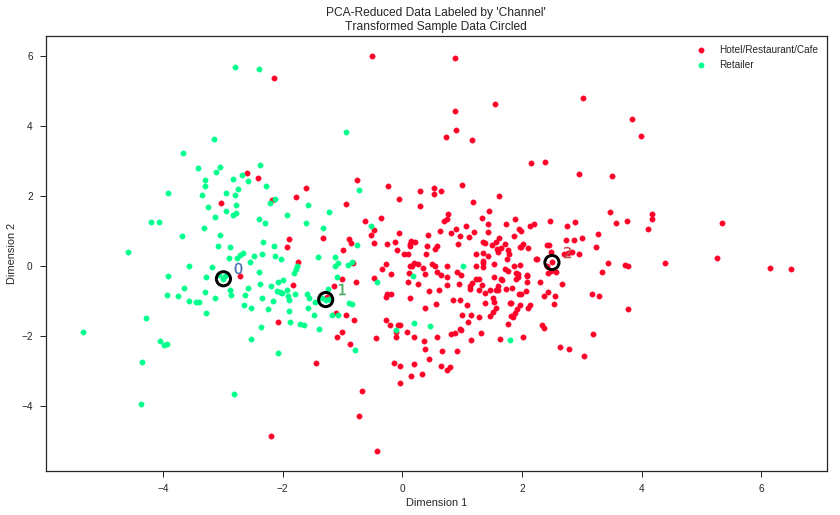

In [92]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** I correctly guessed the cluster types! The clustering algorithm correctly predicted the number of clusters and it correctly predicted the boundaries of the clusters. Cluster 0 corresponds to the hotel/restaurant/cafe group, and cluster 1 corresponds to the retailer fairly well. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.